In [1]:
#Data augmentation.
#A new model is defined for training on augmented images. It includes one additional convned layer
#and a dropout layer
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


Metal device set to: Apple M1


2023-03-20 10:07:10.205293: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-20 10:07:10.205316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "/Users/ajdinburnic/Desktop/Master Thesis/Dataset/train"
validation_dir = "/Users/ajdinburnic/Desktop/Master Thesis/Dataset/validation"

#image augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  zoom_range=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=30,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=30,
    class_mode='binary')

from tensorflow.keras.optimizers.legacy import RMSprop #legacy vazno!!!

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate = 1e-4),
             metrics=['acc'])

model_training = model.fit(train_generator,
                           steps_per_epoch=100,
                           epochs = 100,
                           validation_data=validation_generator,
                           validation_steps = 33)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


2023-03-20 10:07:28.375422: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-20 10:07:28.909279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.5852 - acc: 0.6983

2023-03-20 10:08:03.599446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 42s 380ms/step - loss: 0.5852 - acc: 0.6983 - val_loss: 0.4349 - val_acc: 0.7838
Epoch 2/100
100/100 [==============================] - 39s 392ms/step - loss: 0.4686 - acc: 0.7777 - val_loss: 0.4031 - val_acc: 0.8182
Epoch 3/100
100/100 [==============================] - 40s 401ms/step - loss: 0.4195 - acc: 0.8120 - val_loss: 0.3115 - val_acc: 0.8646
Epoch 4/100
100/100 [==============================] - 40s 399ms/step - loss: 0.3879 - acc: 0.8250 - val_loss: 0.3745 - val_acc: 0.8485
Epoch 5/100
100/100 [==============================] - 40s 395ms/step - loss: 0.3660 - acc: 0.8473 - val_loss: 0.2991 - val_acc: 0.8616
Epoch 6/100
100/100 [==============================] - 40s 405ms/step - loss: 0.3498 - acc: 0.8530 - val_loss: 0.4612 - val_acc: 0.7899
Epoch 7/100
100/100 [==============================] - 40s 399ms/step - loss: 0.3405 - acc: 0.8547 - val_loss: 0.2326 - val_acc: 0.9091
Epoch 8/100
100/100 [==============================] - 40s 3

Epoch 61/100
100/100 [==============================] - 41s 406ms/step - loss: 0.1305 - acc: 0.9557 - val_loss: 0.1119 - val_acc: 0.9646
Epoch 62/100
100/100 [==============================] - 41s 407ms/step - loss: 0.1217 - acc: 0.9517 - val_loss: 0.1812 - val_acc: 0.9313
Epoch 63/100
100/100 [==============================] - 40s 405ms/step - loss: 0.1233 - acc: 0.9513 - val_loss: 0.0949 - val_acc: 0.9707
Epoch 64/100
100/100 [==============================] - 40s 404ms/step - loss: 0.1140 - acc: 0.9530 - val_loss: 0.0899 - val_acc: 0.9636
Epoch 65/100
100/100 [==============================] - 41s 406ms/step - loss: 0.1194 - acc: 0.9520 - val_loss: 0.1242 - val_acc: 0.9596
Epoch 66/100
100/100 [==============================] - 41s 406ms/step - loss: 0.1196 - acc: 0.9557 - val_loss: 0.1529 - val_acc: 0.9475
Epoch 67/100
100/100 [==============================] - 41s 406ms/step - loss: 0.1268 - acc: 0.9520 - val_loss: 0.1445 - val_acc: 0.9485
Epoch 68/100
100/100 [===================

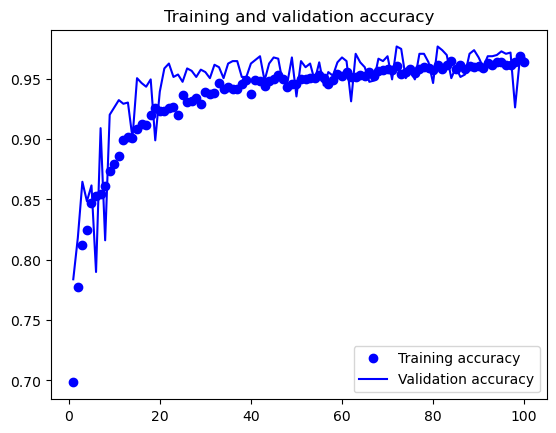

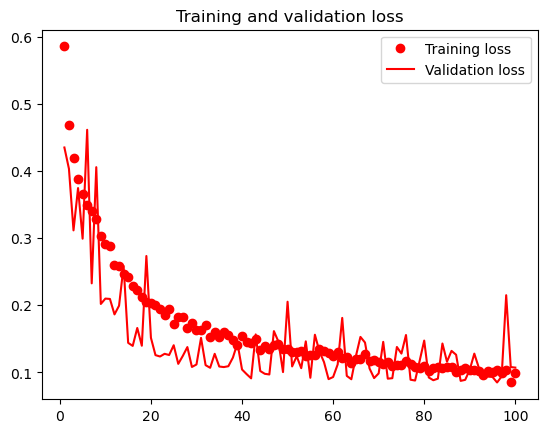

In [3]:
#plotting the validation and training curves
import matplotlib.pyplot as plt

acc = model_training.history['acc']
val_acc = model_training.history['val_acc']
loss = model_training.history['loss']
val_loss = model_training.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()